In [27]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [28]:
function plot_timeseries(sol, tstart, tend, indexs, labels)
    indexx, indexy = indexs
    labelx, labely = labels
    f = Figure(size = (1000, 250))
    ax = Axis(f[1,1], xlabel = labelx, ylabel = labely)
    lines!(ax, sol.t[tstart:tend], sol[indexx, tstart:tend], color = :red)
    lines!(ax, sol.t[tstart:tend], sol[indexy, tstart:tend], color = :green)
    display(GLMakie.Screen(), f)
end

function plot_phase_space(sol, tstart, tend, indexs, labels)
    indexx, indexy, indexz = indexs
    labelx, labely, labelz = labels
    f = Figure(size = (400, 400))
    ax = Axis3(f[1,1], xlabel = labelx, ylabel = labely, zlabel = labelz)
    lines!(ax, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend])
    display(GLMakie.Screen(), f)
end

function FHN2_try3(u, p ,t)
    x1, y1, x2, y2, z= u
    ϵ, a, g, k, σ, α, k1, k2 = p

    I(ϕ_i) = g * (1.0/(1.0 + exp(k*(cos(σ/2) - cos(ϕ_i - α - σ/2)))))
    ρz = k1 + k2 * z ^ 2

    ϕ2 = atan(y2, x2)
    ϕ1 = atan(y1, x1)

    dx1dt = (x1 - x1 ^ 3 / 3 - y1 + I(ϕ2) + ρz * (x2 - x1) ) / ϵ
    dy1dt = x1 - a
    dx2dt = (x2 - x2 ^ 3 / 3 - y2 + I(ϕ1) + ρz * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    dzdt = x1 - x2
    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function FHN2_try3_params()
    ϵ = 0.01; a = -1.01;
    g = 0.1; k = 50.0; σ = 50.0 * pi / 180; α = 160.0 * pi / 180;
    k1 = 0.0; k2 = 0.0
    return [ ϵ, a, g, k, σ, α, k1, k2]
end

FHN2_try3_params (generic function with 1 method)

In [146]:
testrange = range(0.0, 1.0, length = 1000)
testrange.step.hi

0.0010010010010006454

In [213]:
parameters = FHN2_try3_params()
parameters[7] = 0.09
parameters[8] = 0.0010010010010006454*9
tspan = (0.0, 1000)

u0 = SVector{5}([-1.0217434347099232, -0.6328166292660583, -1.0212262686278624, -0.6328541465251893, -0.9999624827371858])
prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

In [215]:
indexx, indexy, indexz = 1, 3, 4
labelx, labely, labelz = "x1", "x2", "y2"
ticksize = 25
labelsize = 40
lw = 2.0

2.0

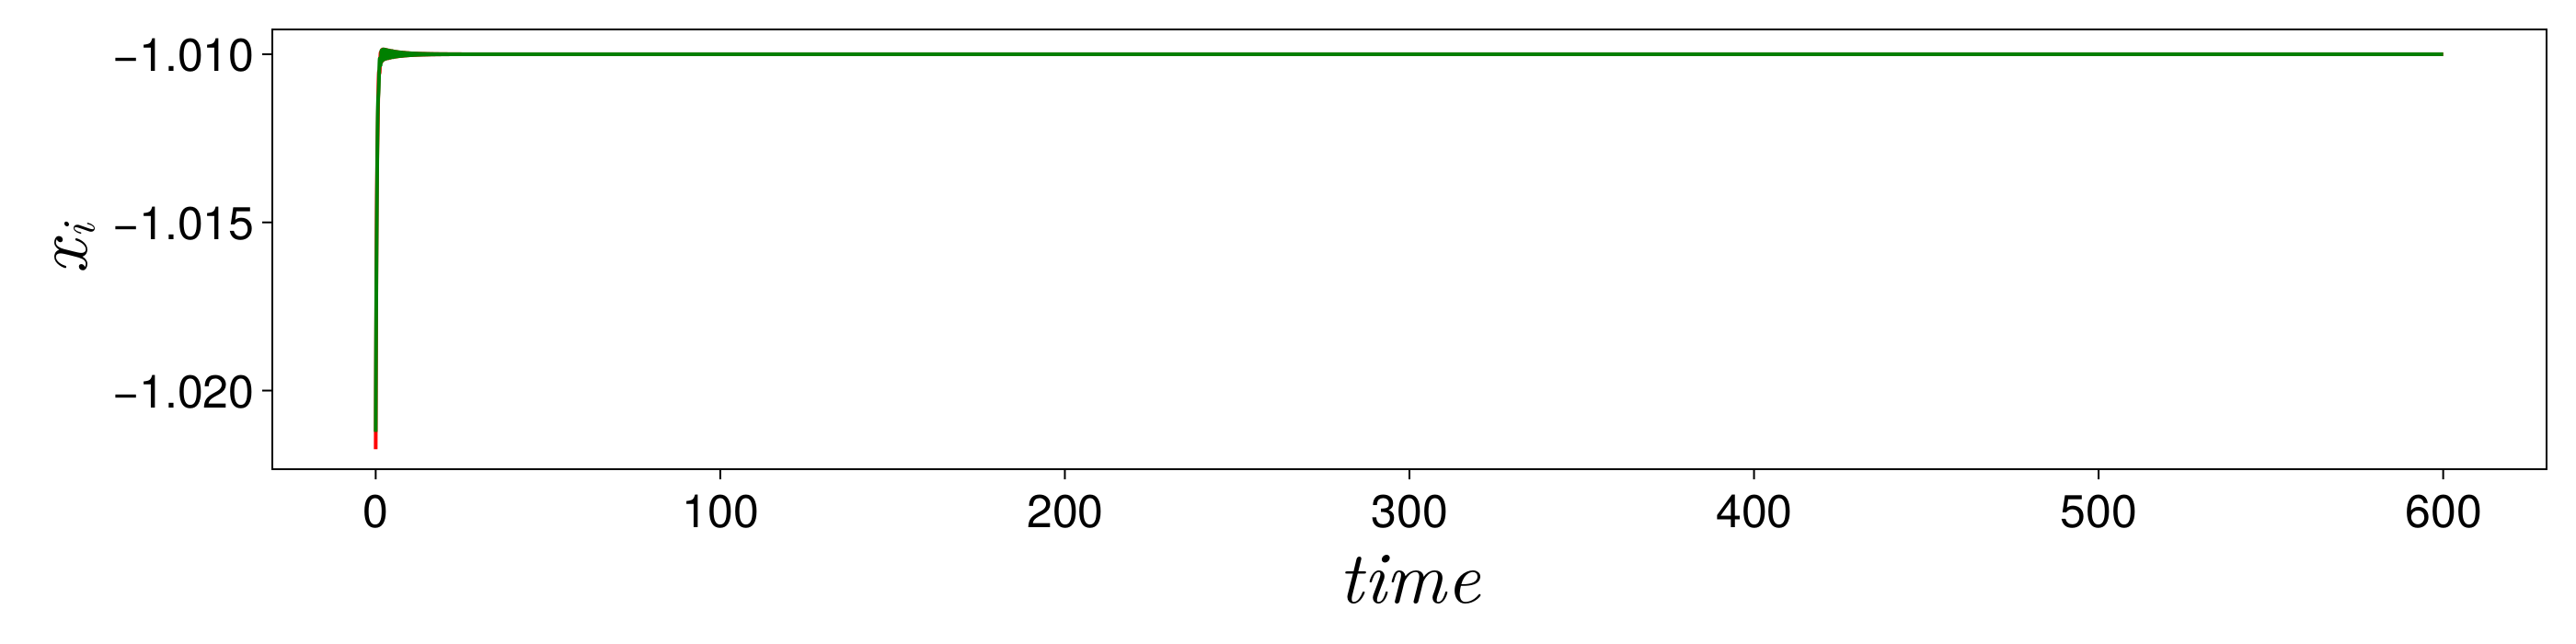

CairoMakie.Screen{IMAGE}


In [216]:
tstart = 1; tend = 600000
f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)
lines!(ax, sol.t[tstart:tend], sol[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, sol.t[tstart:tend], sol[indexy, tstart:tend], color = :green, linewidth = lw)
display(f)

In [ ]:
indexx, indexy, indexz = 1, 3, 4
labelx, labely, labelz = "x1", "x2", "y2"
ticksize = 25
labelsize = 40
lw = 2.0

az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
    xticks = [-2, 0, 2], yticks = [-2, 0, 2], xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(ax3d, sol[1, tstart:tend], sol[3, tstart:tend], sol[indexz, tstart:tend], linewidth = lw)
display(f)

In [144]:
[-1.2970674243636868, -0.4781526501621358, -1.2826787671116873, -0.4895689424442473, -0.988583707714248];

In [203]:
integ_set = (alg = RK4(), adaptive = false, dt = 0.001)

for index in range(1, length(testrange))
    if index == 1
        global u0loc = SVector{5}([-1.0217434347099232, -0.6328166292660583, -1.0212262686278624, -0.6328541465251893, -0.9999624827371858])
    end

    parameters[8] = testrange[index]

    prob = ODEProblem(FHN2_try3, u0loc, tspan, parameters)
    sol = solve(prob, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);
    u0loc = sol[end]

    
    ds = CoupledODEs(FHN2_try3, u0loc, parameters, diffeq = integ_set)
    pmap = PoincareMap(ds, (3, -1.01); Tmax = 1e6)
    tr, trange = trajectory(pmap, 1000)
end

ErrorException: Exceeded `Tmax` without crossing the plane.

In [198]:
integ_set = (alg = RK4(), adaptive = false, dt = 0.001)
ds = CoupledODEs(FHN2_try3, sol[end], parameters, diffeq = integ_set)

5-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  FHN2_try3
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [0.01, -1.01, 0.1, 50.0, 0.8726646259971648, 2.792526803190927, 0.09, 0.005005005005003227]
 time:          0.0
 state:         [-1.0094243137585275, -0.6367764043244797, -1.0105753080453923, -0.6367334247153583, -1.0000429796053723]


In [199]:
pmap = PoincareMap(ds, (3, -1.01); Tmax = 1e6)

5-dimensional PoincareMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  FHN2_try3
 hyperplane:    (3, -1.01)
 crossing time: 0.17224351836895554
 parameters:    [0.01, -1.01, 0.1, 50.0, 0.8726646259971648, 2.792526803190927, 0.09, 0.005005005005003227]
 time:          0
 state:         [-1.0100010551159353, -0.6366985803834203, -1.0100000002668061, -0.6368110997634864, -0.9998874806161849]


In [200]:
tr, trange = trajectory(pmap, 1000)

(5-dimensional StateSpaceSet{Float64} with 1001 points, 0:1:1000)

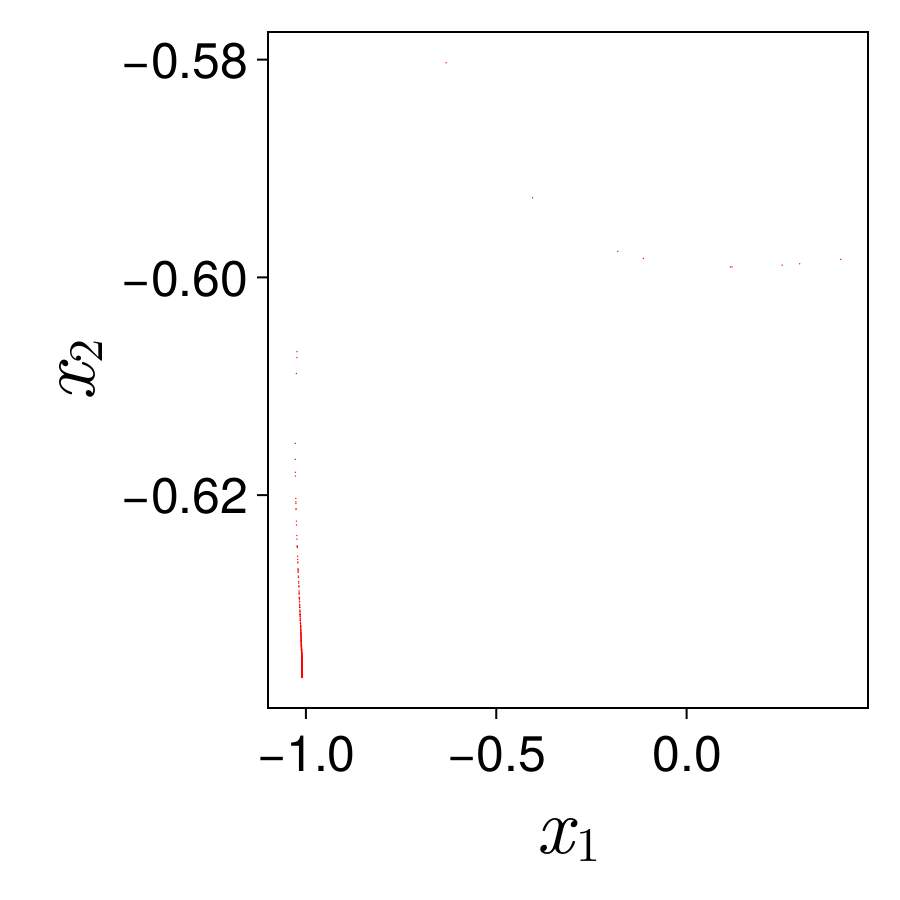

CairoMakie.Screen{IMAGE}


In [201]:
tstartpo = 100; tendpo = length(tr)
indexx = 1; indexy = 2

f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xgridvisible = false, ygridvisible = false,
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = ticksize, yticklabelsize = ticksize)
scatter!(tr[tstartpo:tendpo, indexx], tr[tstartpo:tendpo, indexy], color = :red, markersize = 1.0)

display(f)